Импортируем все, что нужно для работы

In [38]:
import cv2
import statistics as st
import math
import time
from IPython.display import Image
from matplotlib import pyplot as plt

Считываем изображение

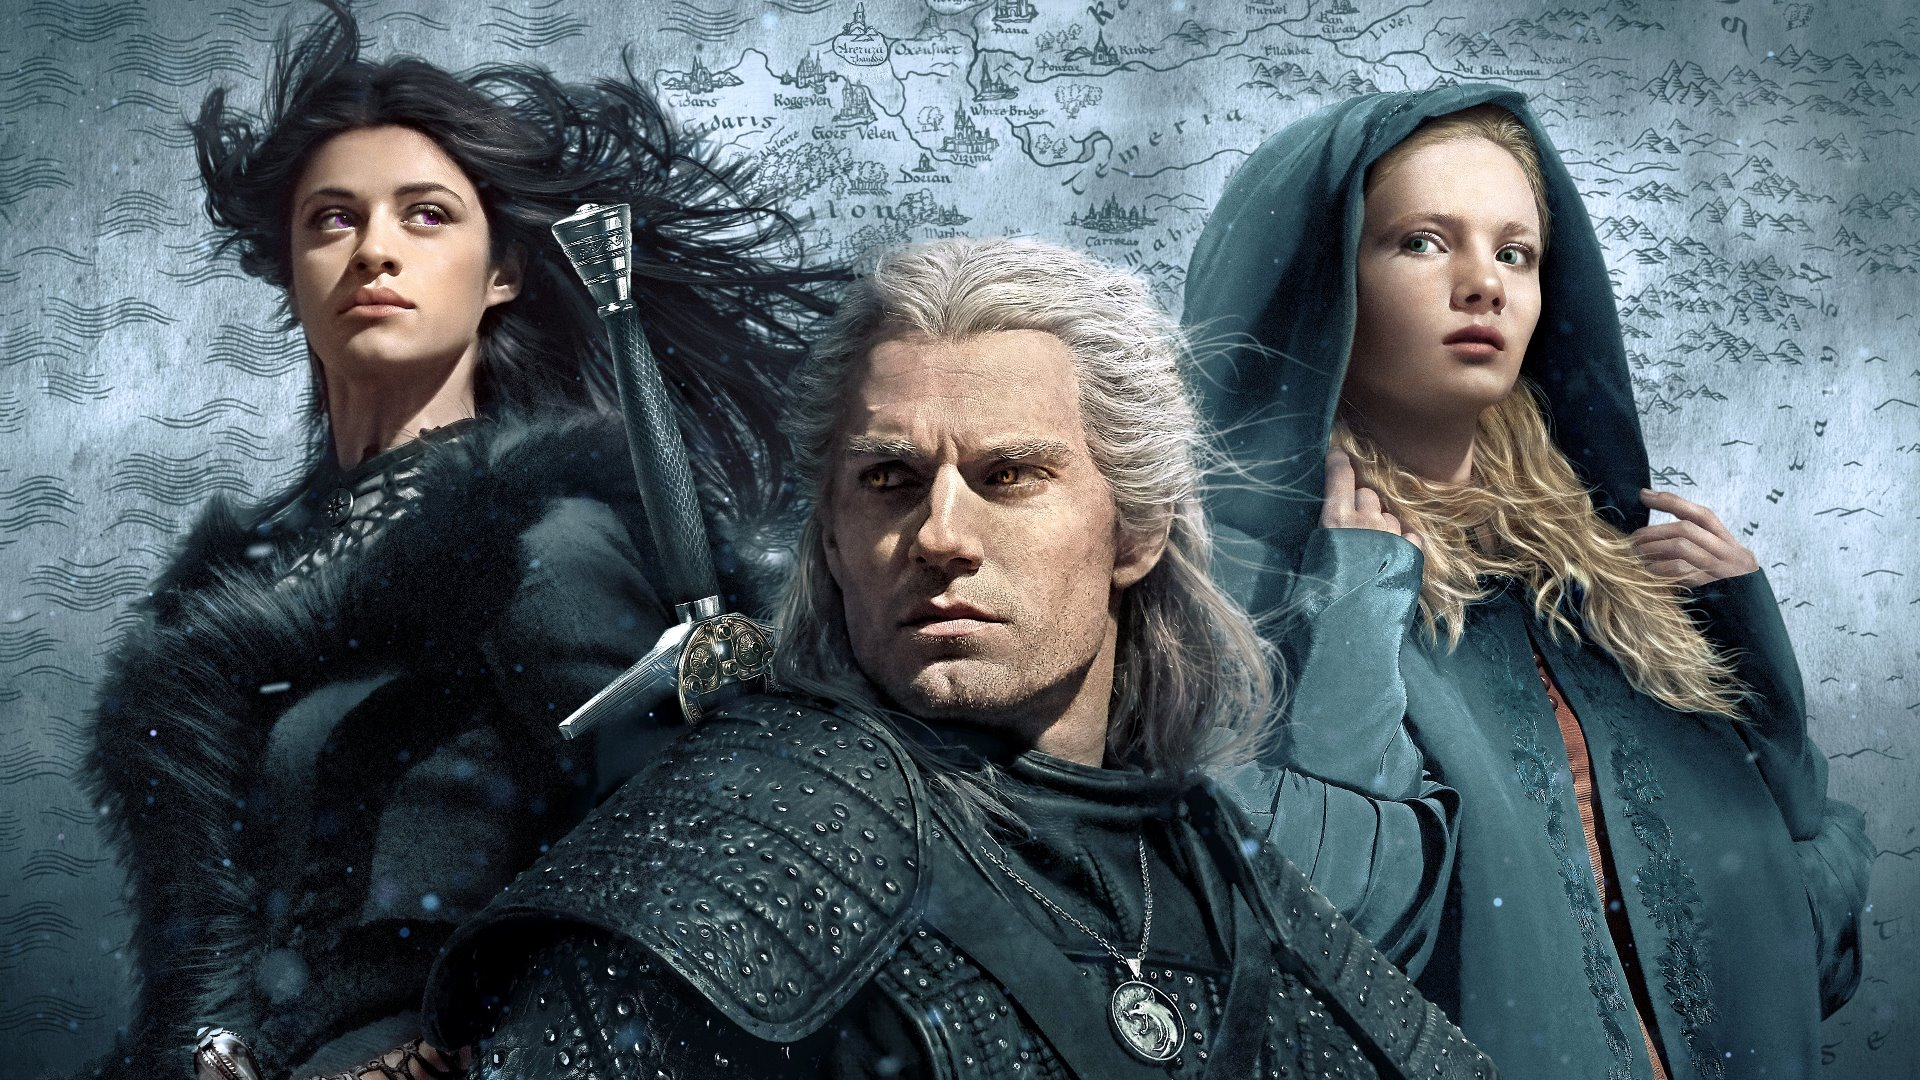

In [39]:
image = cv2.imread("hero-poster-full-hd.jpg")
Image(data="hero-poster-full-hd.jpg", width = 400)

Конвертируем в серый, использую cv2::cvtColor()

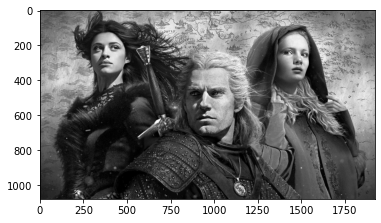

In [40]:
cv_start_time = time.time()
cv_gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv_end_time = time.time()
plt.imshow(cv_gray_image, cmap='gray', vmin = 0, vmax = 255)

Конвертируем в серый, используя average  (R + G + B) / 3 фильтр

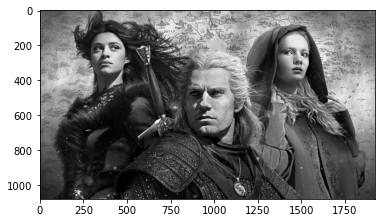

In [41]:
my_start_time = time.time()
for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        pixel = image[i, j]
        average = (int(pixel[0]) + int(pixel[1]) + int(pixel[2])) // 3
        image[i, j] = average
my_end_time = time.time()
plt.imshow(image, cmap='gray', vmin = 0, vmax = 255)

Сравниваем полученные изображения, используя метрику psnr

In [42]:
image_change = cv_gray_image.copy()
for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        image_change[i, j] = (int(image[i][j][0]) - int(image_change[i, j])) ** 2

MSE = st.fmean([pixel for row in image_change for pixel in row])

MAX_I = 2 ** 8

PSNR = 10 * math.log10(MAX_I ** 2 / MSE);
print(PSNR)

43.07420149121958


Время работы cv реализации

In [43]:
print(cv_end_time - cv_start_time)

0.0050008296966552734


Время работы собственной реализации

In [44]:
print(my_end_time - my_start_time)

5.659418106079102


Выводы: собственная реализация по качеству и скорости работы сильно отстает от cv реализации